In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import Image


(-0.5, 99.5, 99.5, -0.5)

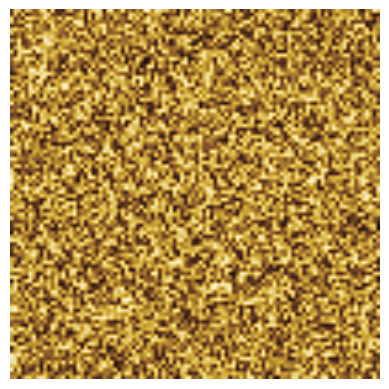

In [72]:
# Parametry
a = 2.8e-4
b = 5e-3
tau = 0.1
k = -0.005
size = 100
dx = 2.0 / size
dt = 0.001

# Inicjalizacja
U = np.random.rand(size, size)
V = np.random.rand(size, size)

# Definicja gepardziej palety
cheetah_colors = ["#1a0d0d", "#8b5a2b", "#d4af37", "#fff8dc"]  
cheetah_cmap = LinearSegmentedColormap.from_list("cheetah", cheetah_colors)

# Przygotowanie figury
fig, ax = plt.subplots()
im = ax.imshow(U, cmap=cheetah_cmap, interpolation='bilinear', animated=True)
ax.axis('off')

In [3]:
def laplacian(Z):
    return (
        Z[:-2, 1:-1] + Z[2:, 1:-1] +
        Z[1:-1, :-2] + Z[1:-1, 2:] -
        4 * Z[1:-1, 1:-1]
    ) / dx**2

In [4]:
color_counts_over_time = []

def indexed_colormap(U_frame, cmap, bins=4):

    normed_U = (U_frame - U_frame.min())/(U_frame.max() - U_frame.min())
    indices = np.floor(normed_U*bins).astype(int)
    indices[indices == bins] = bins - 1 
    return indices

def update(frame, U, V):
    for _ in range(250):
        deltaU = laplacian(U)
        deltaV = laplacian(V)
        Uc, Vc = U[1:-1, 1:-1], V[1:-1, 1:-1]
        U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
        V[1:-1, 1:-1] = Vc + dt * (b * deltaV + Uc - Vc) / tau
        for Z in (U, V):
            Z[0, :] = Z[1, :]
            Z[-1, :] = Z[-2, :]
            Z[:, 0] = Z[:, 1]
            Z[:, -1] = Z[:, -2]

    im.set_array(U)
    
    color_indices = indexed_colormap(U, cheetah_cmap)
    counts = np.bincount(color_indices.ravel(), minlength=4)
    color_counts_over_time.append(counts)

    return [im]

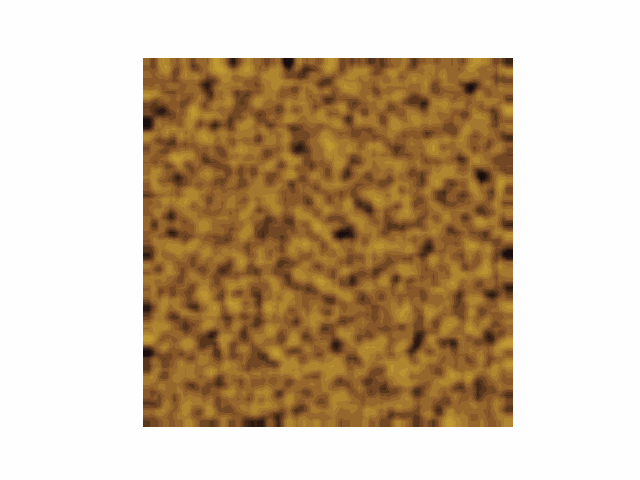

In [5]:
ani = FuncAnimation(fig, update, frames=100, blit=True, fargs=(U, V))
ani.save("turing_animation.gif", writer=PillowWriter(fps=7))
Image(filename='turing_animation.gif')

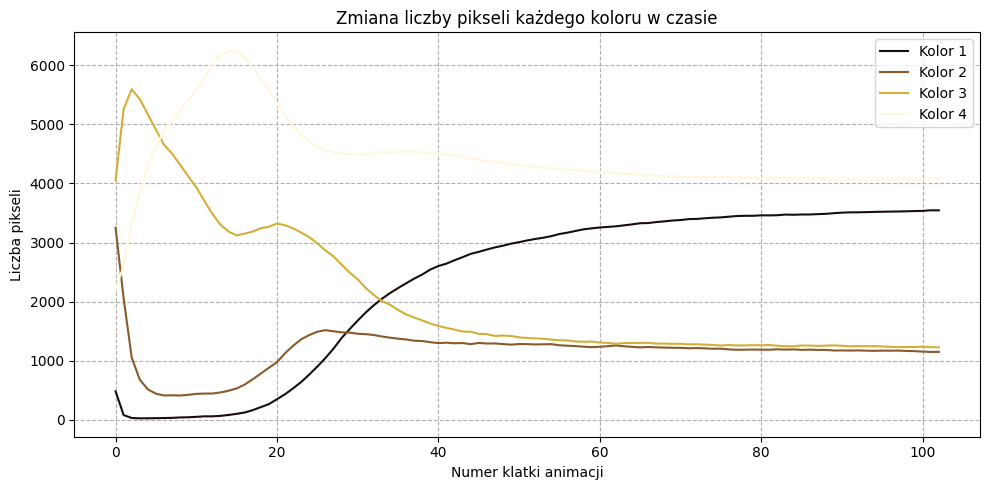

In [6]:
color_counts_over_time = np.array(color_counts_over_time)

plt.figure(figsize=(10, 5))
for i, color in enumerate(cheetah_colors):
    plt.plot(color_counts_over_time[:, i], label=f'Kolor {i+1}', color=color)
    
plt.title("Zmiana liczby pikseli każdego koloru w czasie")
plt.xlabel("Numer klatki animacji")
plt.ylabel("Liczba pikseli")
plt.legend()
plt.tight_layout()
plt.savefig("kolory_w_czasie.png")
plt.grid(linestyle="--")
plt.show()

In [ ]:
#funkcja bez liczenia pikseli poszczególnych kolorach

def update(frame, U, V):
    for _ in range(250):
        deltaU = laplacian(U)
        deltaV = laplacian(V)
        Uc, Vc = U[1:-1, 1:-1], V[1:-1, 1:-1]
        U[1:-1, 1:-1] = Uc + dt * (a * deltaU - Uc*(Vc)**2 + F*(1 - U))
        V[1:-1, 1:-1] = Vc + dt * (b * deltaV + Uc*(Vc)**2 - (F + k)*Vc)
        for Z in (U, V):
            Z[0, :] = Z[1, :]
            Z[-1, :] = Z[-2, :]
            Z[:, 0] = Z[:, 1]
            Z[:, -1] = Z[:, -2]

    im.set_array(U)

    return [im]

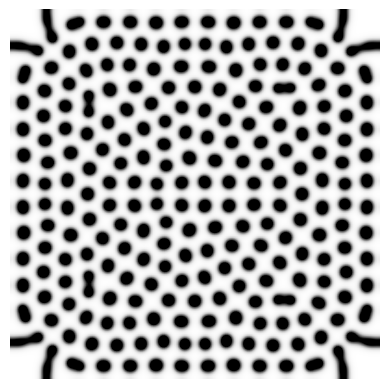

In [ ]:
F = 0.03
k = 0.062
U = np.ones((size, size))
V = np.zeros((size, size))

#warunki początkowe
r = 6  
U[size//2 - r:size//2 + r, size//2 - r:size//2 + r] = 0.50
V[size//2 - r:size//2 + r, size//2 - r:size//2 + r] = 0.25

fig, ax = plt.subplots()
im = ax.imshow(V, cmap='Grays', interpolation='bilinear')
ax.axis('off')

ani = FuncAnimation(fig, update, frames=100, blit=True, fargs=(U, V, im))

#ani.save("turing_kropki.gif", writer=PillowWriter(fps=7))

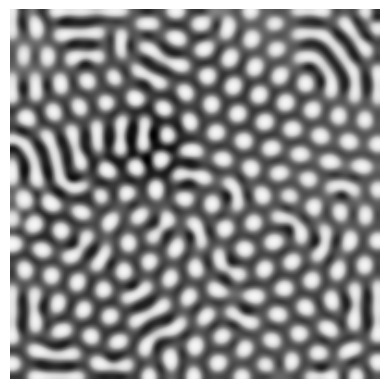

In [ ]:
F = 0.022
k = 0.051
size = 200
U = np.ones((size, size))
V = np.zeros((size, size))

r = 6  
U[size//2 - r:size//2 + r, size//2 - r:size//2 + r] = 0.50
V[size//2 - r:size//2 + r, size//2 - r:size//2 + r] = 0.25

# szum
U += 0.05 * np.random.rand(size, size)
V += 0.05 * np.random.rand(size, size)

fig, ax = plt.subplots()
im = ax.imshow(V, cmap='Grays', interpolation='bilinear')
ax.axis('off')

ani = FuncAnimation(fig, update, frames=100, blit=True, fargs=(U, V, im))

#ani.save("turing_plamki.gif", writer=PillowWriter(fps=7))

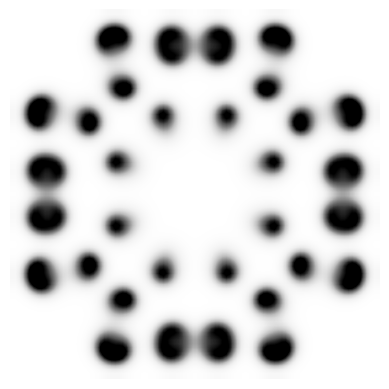

In [ ]:
F = 0.014
k = 0.054
U = np.ones((size, size))
V = np.zeros((size, size))

r = 6  
U[size//2 - r:size//2 + r, size//2 - r:size//2 + r] = 0.50
V[size//2 - r:size//2 + r, size//2 - r:size//2 + r] = 0.25

# U += 0.05 * np.random.rand(*U.shape)
# V += 0.05 * np.random.rand(*V.shape)

fig, ax = plt.subplots()
im = ax.imshow(V, cmap='Grays', interpolation='bilinear')
ax.axis('off')

ani = FuncAnimation(fig, update, frames=100, blit=True, fargs=(U, V, im))

#ani.save("turing_niestabilne_kropki.gif", writer=PillowWriter(fps=7))

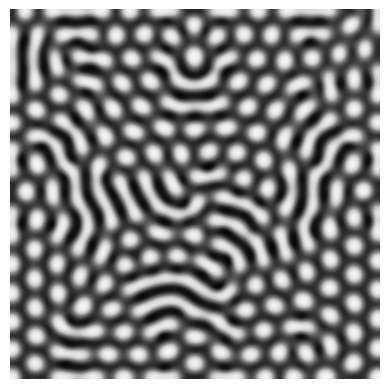

In [ ]:
F = 0.022
k = 0.051
size = 200
U = np.ones((size, size))
V = np.zeros((size, size))

r = 8 
U[size//2 - r:size//2 + r, size//2 - r:size//2 + r] = 0.50
V[size//2 - r:size//2 + r, size//2 - r:size//2 + r] = 0.25

# Szum na całej siatce
U += 0.03 * np.random.rand(size, size)
V += 0.03 * np.random.rand(size, size)

fig, ax = plt.subplots()
im = ax.imshow(V, cmap='Grays', interpolation='bilinear')
ax.axis('off')

ani = FuncAnimation(fig, update, frames=100, blit=True, fargs=(U, V, im))

#ani.save("turing_kółka.gif", writer=PillowWriter(fps=7))